# Dimensionality Reduction 2

Learning objectives
1. Apply NNMF and MDS to different data sets and interpret the outputs
2. Learn how to visualise the model outputs
3. Interpret the results and compare them with PCA

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import NMF, PCA
from sklearn.neighbors import DistanceMetric
from sklearn.manifold import MDS

## Load in datasets
Read in the omics datasets using the pandas [read_excel()](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html) function. For this example we will be using a urine metabolomics data from a diabetes cohort. 

In [2]:
diabetes_urine_metab = pd.read_excel("../Data/diabetes_metabolomics_urine.xlsx")

In [3]:
diabetes_urine_metab

,AGE,GENDER,BMI,ETH,T2D,sample_id,"1,2-propanediol","1,3,7-trimethylurate","1,3-dimethylurate","1,5-anhydroglucitol (1,5-AG)",...,valine,vanillate,vanillylmandelate (VMA),xanthine,xanthosine,xanthurenate,xylitol,xylonate,xylose,xylulose
0,53.103354,0,32.051282,1,0,QMDiab-ID254,6.047778,5.139495,5.395915,4.700819,...,6.846007,4.842959,6.539949,6.102885,4.955612,5.351190,6.076246,6.523386,7.070221,5.843888
1,39.791923,1,30.514263,4,0,QMDiab-ID290,6.768198,5.625987,6.080658,4.627866,...,6.799712,6.075895,6.543918,5.930905,4.882336,5.206206,6.364007,6.581393,6.995853,5.481447
2,36.821355,0,24.168312,1,0,QMDiab-ID54,5.907966,5.202306,5.830899,4.629183,...,6.802152,5.187544,6.685369,6.351419,5.097924,5.461868,6.293151,6.524100,7.145472,5.862930
3,34.759754,0,44.444444,1,1,QMDiab-ID55,5.484953,5.762751,5.708525,4.330880,...,6.872143,4.670134,6.395184,6.125943,5.124419,5.631186,6.507300,6.519363,6.843306,5.930876
4,50.179329,1,27.180900,1,1,QMDiab-ID319,5.930745,5.641339,5.416341,5.134043,...,7.354307,4.936755,6.278002,6.228139,5.073837,5.436361,6.117405,6.451211,6.789772,5.846393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,35.403149,1,33.834027,1,1,QMDiab-ID70,5.941831,4.956884,5.399513,4.835807,...,6.962307,5.290645,6.561388,5.889683,5.096711,5.210236,6.221907,6.471418,6.818403,5.808622
355,49.062286,1,25.644937,1,0,QMDiab-ID118,6.410167,5.598866,5.352533,4.615615,...,6.669171,4.843813,6.450954,6.094366,5.047329,5.279058,6.185024,6.545487,6.750902,5.652239
356,47.222450,1,23.384354,1,0,QMDiab-ID65,5.917367,5.451878,5.690375,4.960909,...,6.971898,4.769460,6.687110,5.743919,4.911957,5.210013,6.322380,6.515640,6.852003,5.739691
357,56.391513,0,27.586207,1,1,QMDiab-ID248,6.442201,5.715085,5.358299,4.981889,...,6.848942,5.117661,6.123253,4.502675,4.848296,4.987745,5.978404,6.554427,7.199247,5.901195


We can see there are several covariates in the first columns: Age, Gender, BMI, ETH, and T2D (diabetes status)

## NMF

We can use the [sklearn.NMF() function](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html) to perform non-negative matrix factorisation on the dataset. We will initialise the model with five components, and use the "random" initialiser.

The input matrix $V$ (the metabolomics dataset without covariates/metadata) will be factorised into the matrices $W$ (weights / projected data) and $H$ (factorization / principal components)

$V \approx WH$

In [4]:
# instantiate the NMF model
# here we will select 5 components
model = NMF(n_components=5, init='random', random_state=0)

# set V as the input omics data matrix
V = diabetes_urine_metab.iloc[:, 6:]

# the weights matrix W is obtained by projecting the original data
W = model.fit_transform(V)

# the components matrix H is obtained by using the .components_ attribute
H = model.components_


/Users/cw2019/opt/anaconda3/envs/py10/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Let's look a the shape of the resulting matrices:

In [5]:
W.shape

(359, 5)

In [6]:
H.shape

(5, 356)

We should be able to approximately reconstruct the original matrix $V$ by calculating the product of $W$ and $H$

In [7]:
# obtain the dot product of the matrices W and H
V_approx = pd.DataFrame(np.dot(W, H))

# This is the same shape as the original matrix V
V_approx.shape

(359, 356)

We can compare the two matrices V and V_approx by eye:

In [8]:
V_approx

,0,1,2,3,4,5,6,7,8,9,...,346,347,348,349,350,351,352,353,354,355
0,6.015066,5.553484,5.557300,4.632183,6.663162,5.969870,4.835519,5.426324,6.678681,5.634201,...,6.846495,4.983442,6.484635,5.909279,4.881300,5.292873,6.223135,6.490160,6.858391,5.820036
1,5.953919,5.395249,5.697025,4.394866,6.775207,5.972706,4.881378,5.357943,7.121031,5.901142,...,6.694616,4.994442,6.681462,6.168760,4.936287,5.265212,6.352699,6.589798,6.878558,5.767724
2,6.061356,5.321433,5.661215,4.449942,6.753411,5.902252,4.915938,5.360639,6.999927,5.901723,...,6.619999,5.174342,6.663189,6.286768,5.003684,5.218991,6.314635,6.610748,6.976711,5.775560
3,5.895209,5.207868,5.473564,4.457802,6.671877,5.732427,4.833301,5.406597,7.082223,5.901349,...,6.746759,4.992642,6.666150,6.108394,4.969324,5.294707,6.294271,6.560824,6.847014,5.718902
4,6.096019,5.710332,5.341366,5.007654,6.571389,5.922329,4.815072,5.632294,6.271258,5.415200,...,7.174989,5.005940,6.358028,5.621295,4.896793,5.439226,6.130013,6.463265,6.911082,5.941965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,5.954170,5.223598,5.185240,4.739657,6.496058,5.550548,4.768637,5.498976,6.615919,5.648792,...,6.919750,5.018961,6.463088,5.857438,4.957991,5.333012,6.135268,6.444324,6.818713,5.735776
355,6.114652,5.433627,5.543359,4.606584,6.655898,5.873458,4.869474,5.375104,6.668547,5.685438,...,6.727534,5.136173,6.489630,6.091656,4.949748,5.224239,6.221841,6.495231,6.909393,5.785782
356,6.137011,5.460424,5.399599,4.705551,6.621102,5.749950,4.835707,5.408945,6.685048,5.640416,...,6.958935,4.999818,6.451945,5.975185,4.952365,5.325635,6.274150,6.407223,6.764652,5.765822
357,6.224854,5.606258,5.312513,4.999818,6.466194,5.845066,4.818144,5.510513,5.905868,5.289151,...,6.877472,5.254178,6.198005,5.750475,4.903990,5.233672,5.966577,6.396984,6.993257,5.886972


In [9]:
V

,"1,2-propanediol","1,3,7-trimethylurate","1,3-dimethylurate","1,5-anhydroglucitol (1,5-AG)","1,6-anhydroglucose","1,7-dimethylurate",1-(3-aminopropyl)-2-pyrrolidone,1-kestose,1-methylhistidine,1-methylimidazoleacetate,...,valine,vanillate,vanillylmandelate (VMA),xanthine,xanthosine,xanthurenate,xylitol,xylonate,xylose,xylulose
0,6.047778,5.139495,5.395915,4.700819,7.159429,5.764686,4.698882,5.329002,6.713003,5.221410,...,6.846007,4.842959,6.539949,6.102885,4.955612,5.351190,6.076246,6.523386,7.070221,5.843888
1,6.768198,5.625987,6.080658,4.627866,7.192310,6.069137,4.860961,5.857516,7.013022,6.631527,...,6.799712,6.075895,6.543918,5.930905,4.882336,5.206206,6.364007,6.581393,6.995853,5.481447
2,5.907966,5.202306,5.830899,4.629183,6.819209,6.005469,4.803543,5.275379,6.748959,5.679394,...,6.802152,5.187544,6.685369,6.351419,5.097924,5.461868,6.293151,6.524100,7.145472,5.862930
3,5.484953,5.762751,5.708525,4.330880,6.667999,6.042379,5.119500,5.221393,6.628081,5.500552,...,6.872143,4.670134,6.395184,6.125943,5.124419,5.631186,6.507300,6.519363,6.843306,5.930876
4,5.930745,5.641339,5.416341,5.134043,6.612588,5.792299,4.506334,5.557778,6.615401,5.460190,...,7.354307,4.936755,6.278002,6.228139,5.073837,5.436361,6.117405,6.451211,6.789772,5.846393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,5.941831,4.956884,5.399513,4.835807,6.887322,5.493904,5.256156,5.148100,6.033479,6.105121,...,6.962307,5.290645,6.561388,5.889683,5.096711,5.210236,6.221907,6.471418,6.818403,5.808622
355,6.410167,5.598866,5.352533,4.615615,6.646287,5.804204,4.944526,5.412823,6.497704,5.866312,...,6.669171,4.843813,6.450954,6.094366,5.047329,5.279058,6.185024,6.545487,6.750902,5.652239
356,5.917367,5.451878,5.690375,4.960909,7.377290,5.698459,5.019318,5.645608,6.910945,5.757670,...,6.971898,4.769460,6.687110,5.743919,4.911957,5.210013,6.322380,6.515640,6.852003,5.739691
357,6.442201,5.715085,5.358299,4.981889,6.157371,5.965616,4.867823,5.652647,5.772530,5.574786,...,6.848942,5.117661,6.123253,4.502675,4.848296,4.987745,5.978404,6.554427,7.199247,5.901195


We can also estimate the reconstruction error using the Frobenius norm:

In [10]:
model.reconstruction_err_

95.66964266106348

How does the reconstruction error change as you vary `n_components`?

### Interpreting NMF

The $H$ matrix contains the loadings or principal components, summarising the importance of each feature (metabolites in this case) in the new components, of which we have selected 5.

In [11]:
# add metabolite names to the matrix H to help interpretation
H_df = pd.DataFrame(H.T, columns=range(1, H.shape[0]+1), index=V.columns)

In [12]:
H_df

,1,2,3,4,5
"1,2-propanediol",0.273733,1.830349,1.481363,1.033758,0.888875
"1,3,7-trimethylurate",1.358613,0.410398,1.980342,0.111191,0.000000
"1,3-dimethylurate",1.060960,0.273454,1.598004,0.996626,0.294347
"1,5-anhydroglucitol (1,5-AG)",1.026682,0.985130,0.678206,0.240012,0.658719
"1,6-anhydroglucose",1.172382,0.623094,1.340571,1.230614,0.955839
...,...,...,...,...,...
xanthurenate,1.243559,0.385358,0.736947,0.663678,0.996555
xylitol,0.807228,0.761326,1.262182,1.234549,1.185545
xylonate,1.512231,0.438501,0.690497,1.288831,1.053196
xylose,1.532787,0.845682,0.722945,1.296620,0.935189


If we sort each column, we can determine the most important metabolites driving each component (1-5)


In [13]:
# for each component, print out the top 5 features driving that component
for col in H_df:
    print("Component: "+ str(col))
    print(H_df[col].sort_values(ascending=False)[0:5].index.tolist())

Component: 1
['myo-inositol', 'proline', 'alanine', 'mannose', 'ornithine']
Component: 2
['ascorbate (Vitamin C)', 'stachydrine', 'chiro-inositol', 'acetylcarnitine', 'propionylcarnitine']
Component: 3
['7-methylxanthine', '1,3,7-trimethylurate', 'paraxanthine', 'glucosamine', 'fructose']
Component: 4
['3-aminoisobutyrate', 'stachydrine', 'ascorbate (Vitamin C)', '1-methylhistidine', 'xanthine']
Component: 5
['dehydroisoandrosterone sulfate (DHEA-S)', 'andro steroid monosulfate 2*', '4-androsten-3beta,17beta-diol disulfate 2*', '4-androsten-3beta,17beta-diol disulfate 1*', 'pregnen-diol disulfate*']


Visualise the first (not top) 20 metabolites in the metabolomics data, alongside their contribution to the 5 latent factors:

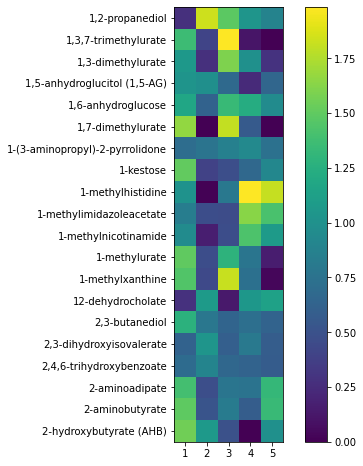

In [14]:
plt.figure(figsize=(8, 8))
plt.imshow(H_df.iloc[0:20, :], cmap="viridis")
plt.yticks(range(len(H_df.iloc[0:20, :].index)), H_df.iloc[0:20, :].index)
plt.xticks(range(0, 5), [1, 2, 3, 4, 5])
plt.colorbar()
plt.show()

Visualise the first two components of the NMF projected data ($W$) using a scatterplot:

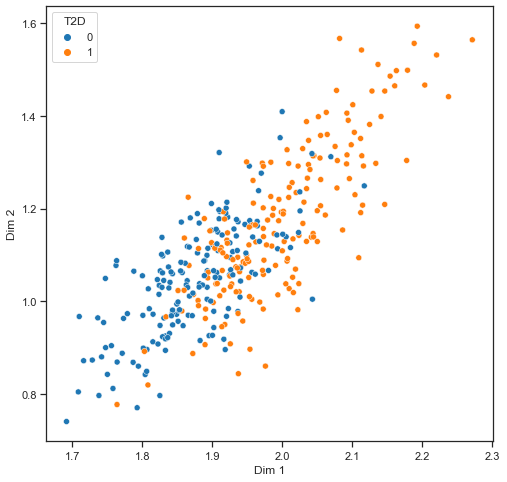

In [15]:
sns.set_style("ticks")
sns.set_context("notebook")
plt.figure(figsize=(8, 8))

p = sns.scatterplot(x=W[:, 0],
 y=W[:, 1], 
 hue=diabetes_urine_metab["T2D"])

p.set_xlabel("Dim 1")
p.set_ylabel("Dim 2")

plt.show()

We can also plot a heatmap using the NMF projected data $W$, which clusters the samples based on T2D status using the five latent factors:

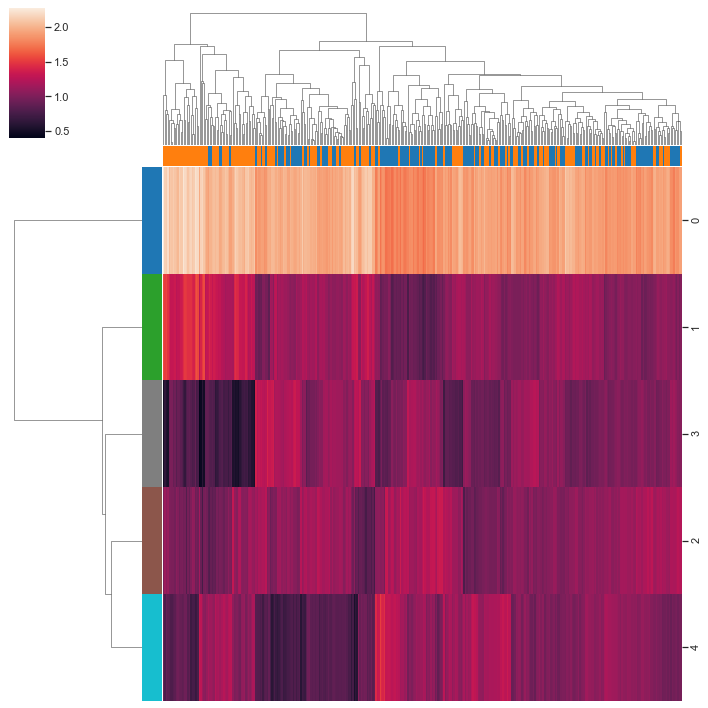

In [91]:
sns.clustermap(W.T,
col_colors=["tab:orange" if i == 1 else "tab:blue" for i in diabetes_urine_metab["T2D"]],
row_colors=sns.color_palette("tab10"),
xticklabels=False)

plt.show()

### NMF parameters: alpha and L1 ratio
Find the full list of parameters [here](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html) with explanations and default values. 

We can control the amount of regularisation in the NMF model by adjusting the $L1$ and $L2$ priors. The amount of L1 to L2 reqularisation can be controlled by setting the `l1_ratio`. The intensity of the regularisation can be set using the `alpha_W` and `alpha_H` parameters. By default, `alpha_W` is set to 0.0, and `alpha_H` is set to the same as `alpha_W`.

The `l1_ratio` is set to 0.0 by default. For l1_ratio = 0 the penalty is an elementwise L2 penalty (aka Frobenius Norm). For l1_ratio = 1 it is an elementwise L1 penalty. For 0 < l1_ratio < 1, the penalty is a combination of L1 and L2.

Read in more detail about the various sklearn NMF parameters [here](https://scikit-learn.org/stable/modules/decomposition.html#nmf).

In [66]:
# instantiate the NMF model
# set the L1 ratio to 0.5
model_l1_05 = NMF(n_components=5, init='random', l1_ratio=0.5, alpha_W=0.5)

# set V as the input omics data matrix
V = diabetes_urine_metab.iloc[:, 6:]

# the weights matrix W is obtained by projecting the original data
W_l1_05 = model.fit_transform(V)

# the components matrix H is obtained by using the .components_ attribute
H_l1_05 = model.components_

/Users/cw2019/opt/anaconda3/envs/py10/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [57]:
# instantiate the NMF model
# set the L1 ratio to 0.5
model_l1_08 = NMF(n_components=5, init='random', l1_ratio=0, alpha_W=1)

# the weights matrix W is obtained by projecting the original data
W_l1_08 = model.fit_transform(V)

# the components matrix H is obtained by using the .components_ attribute
H_l1_08 = model.components_

/Users/cw2019/opt/anaconda3/envs/py10/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


## Multi dimensional scaling (MDS)

[Multidimensional scaling](https://scikit-learn.org/0.24/modules/manifold.html#multidimensional-scaling) (MDS) seeks a low-dimensional representation of the data in which the distances respect well the distances in the original high-dimensional space. MDS (both metric and non-metric) can be performed using the sklearn.[MDS()](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.html) function.

### Metric MDS

In [75]:
embedding = MDS(n_components=2, metric=True)

In [76]:
embedding_euclidean = embedding.fit_transform(diabetes_urine_metab.iloc[:, 6:])

Visualise the first two MDS components:

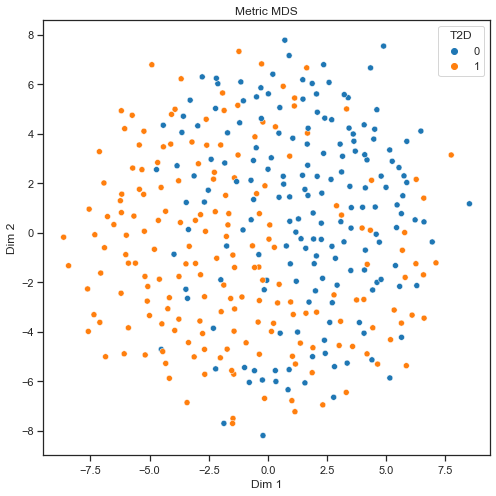

In [77]:
sns.set_style("ticks")
sns.set_context("notebook")
plt.figure(figsize=(8, 8))

p = sns.scatterplot(x=embedding_euclidean[:, 0],
 y=embedding_euclidean[:, 1], 
 hue=diabetes_urine_metab["T2D"])

p.set_xlabel("Dim 1")
p.set_ylabel("Dim 2")
plt.title("Metric MDS")
plt.show()

### Dissimilarity metrics
We can use different metrics to compute the dissimilarity matrix for metric MDS. The default option used in the MDS function is Euclidean distance. We can otherwise specify `dissimilarity = "precomputed"`. Here we provide a dissimilarity matrix we have already computed. 

We can compute the dissimilarity matrix using [various metrics](https://scikit-learn.org/0.24/modules/generated/sklearn.neighbors.DistanceMetric.html).

Running MDS on a precomputed Manhattan distance dissimilarity matrix

In [85]:
manhattan_dist = DistanceMetric.get_metric('manhattan').pairwise(diabetes_urine_metab.iloc[:, 6:])

embedding_manhattan = MDS(n_components=2, metric=True, dissimilarity="precomputed")
MDS_manhattan = embedding_manhattan.fit_transform(manhattan_dist)

and Minkowski distance

In [84]:
minkowski_dist = DistanceMetric.get_metric('minkowski').pairwise(diabetes_urine_metab.iloc[:, 6:])

embedding_minkowski = MDS(n_components=2, metric=True, dissimilarity="precomputed")
MDS_minkowski = embedding_minkowski.fit_transform(minkowski_dist)

Compare the results obtained using metric MDS with different dissimilarity metrics:

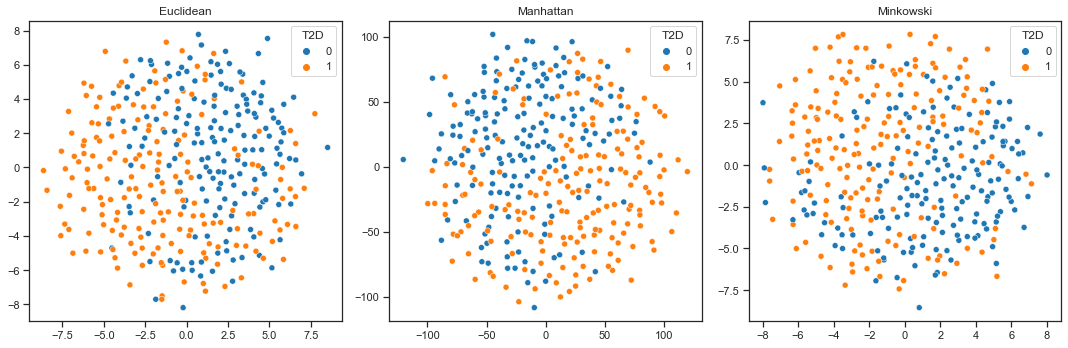

In [86]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

sns.scatterplot(x=embedding_euclidean[:, 0], y=embedding_euclidean[:, 1], hue=diabetes_urine_metab["T2D"], ax=ax1)
ax1.set_title("Euclidean")

sns.scatterplot(x=MDS_manhattan[:, 0], y=MDS_manhattan[:, 1], hue=diabetes_urine_metab["T2D"], ax=ax2)
ax2.set_title("Manhattan")

sns.scatterplot(x=MDS_minkowski[:, 0], y=MDS_minkowski[:, 1], hue=diabetes_urine_metab["T2D"], ax=ax3)
ax3.set_title("Minkowski")

plt.tight_layout()
plt.show()

Using previous code examples, compute another similarity metric based on the metabolomics data (full list [here](https://scikit-learn.org/0.24/modules/generated/sklearn.neighbors.DistanceMetric.html)) and visualise the first two components using a scatterplot:

In [87]:
# Write code here...

### Non-metric MDS
To compute non-metric MDS, set the parameter `metric=False`

In [20]:
embedding_nonmetric = MDS(n_components=2, metric=False)
diabetes_urine_metab_transformed_nMDS = embedding_nonmetric.fit_transform(diabetes_urine_metab.iloc[:, 6:])

Visualise the first two non-metric MDS components:

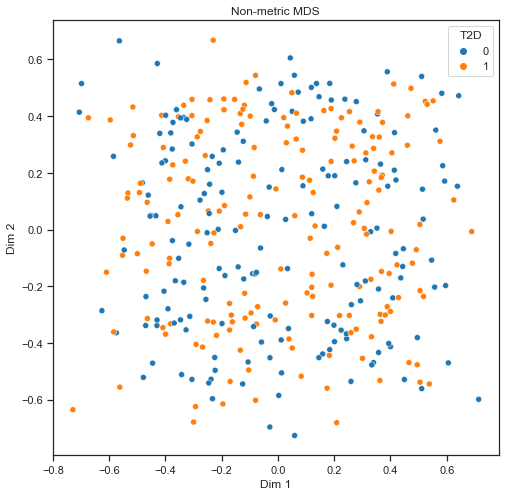

In [21]:
sns.set_style("ticks")
sns.set_context("notebook")
plt.figure(figsize=(8, 8))

p = sns.scatterplot(x=diabetes_urine_metab_transformed_nMDS[:, 0],
 y=diabetes_urine_metab_transformed_nMDS[:, 1], 
 hue=diabetes_urine_metab["T2D"])

p.set_xlabel("Dim 1")
p.set_ylabel("Dim 2")
plt.title("Non-metric MDS")
plt.show()

## How do NNMF and MDS compare with PCA?

Using what you have learnt from the previous tutorial on PCA, scale the input metabolomics data, apply PCA and project the metabolomics data into the latent space, and visualise the data using a scatterplot. Colour the datapoints by Type 2 diabetes status "T2D".

In [22]:
# import scaler
from sklearn.preprocessing import StandardScaler

# scale the data
diabetes_urine_metab_scaled = StandardScaler().fit_transform(diabetes_urine_metab.iloc[:, 6:])

In [25]:
# perform PCA and project the data
pca_res = PCA(n_components=2).fit_transform(diabetes_urine_metab_scaled)

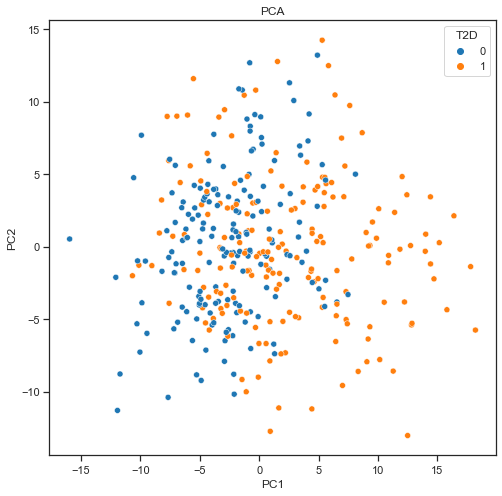

In [27]:
# plot two components of the projected data on a scatter plot
sns.set_style("ticks")
sns.set_context("notebook")
plt.figure(figsize=(8, 8))

p = sns.scatterplot(x=pca_res[:, 0],
 y=pca_res[:, 1],
 hue=diabetes_urine_metab["T2D"])

p.set_xlabel("PC1")
p.set_ylabel("PC2")

plt.title("PCA")

plt.show()

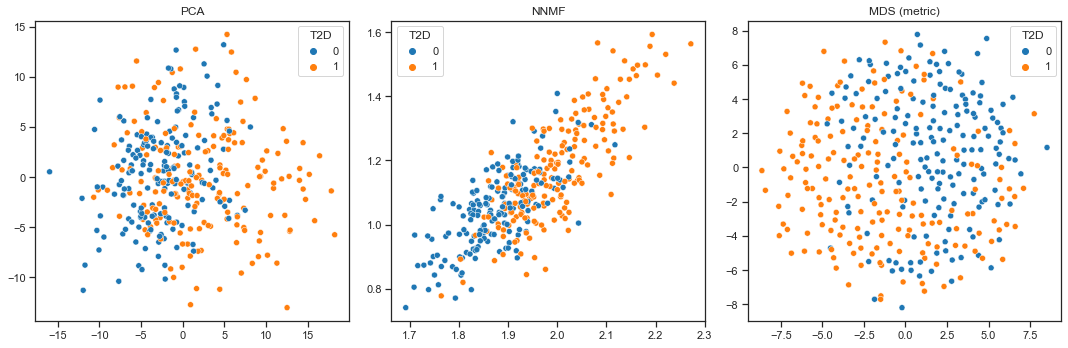

In [89]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

sns.scatterplot(x=pca_res[:, 0], y=pca_res[:, 1], hue=diabetes_urine_metab["T2D"], ax=ax1)
ax1.set_title("PCA")

sns.scatterplot(x=W[:, 0], y=W[:, 1], hue=diabetes_urine_metab["T2D"], ax=ax2)
ax2.set_title("NNMF")

sns.scatterplot(x=embedding_euclidean[:, 0], y=embedding_euclidean[:, 1], hue=diabetes_urine_metab["T2D"], ax=ax3)
ax3.set_title("MDS (metric)")

plt.tight_layout()
plt.show()

Note - look at the axes: using NNMF all weights are POSITIVE, unlike in PCA or MDS

## Your turn
Choose one of the other omics datasets in the `Data` folder and perform either MDS or NNMF on it. Visualise the results.

In [ ]:
# Import dataset

In [ ]:
# Perform NNMF/MDS

In [ ]:
# Visualise the results